<a href="https://colab.research.google.com/github/rohananpothle/Fuel_eff_pred_By_Rohan/blob/main/Fuel_eff_pred_By_Rohan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect('Database.db')

In [ ]:
import sqlite3
conn = sqlite3.connect('/content/drive/MyDrive/DataAnalysis/Database.db')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
#cursor = conn.cursor()

In [ ]:
for table in tables:
    print(table[0])

Electric_cars
Fraud_detection
Heart_disease
Insurance_Prediction
TripAdviser_Reviews
Ecommerce_data
Automobile_data
Supermarket_data


## Load the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#conn = sqlite3.connect('/content/drive/MyDrive/DataAnalysis/Database.db')
data = pd.read_sql_query('Select * from Automobile_data' , conn)
data.head()

,r,m (kg),Mt,Ewltp (g/km),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),Erwltp (g/km),Fuel consumption,Electric range (km)
0,1,1262.0,1352.0,133.0,petrol,M,999.0,84.0,NaN,1.56,5.8,NaN
1,1,2434.0,2559.0,0.0,electric,E,NaN,300.0,193.0,NaN,NaN,445.0
2,1,1984.0,2095.0,0.0,electric,E,NaN,220.0,157.0,NaN,NaN,455.0
3,1,1314.0,1386.0,149.0,petrol,M,1498.0,78.0,NaN,NaN,6.6,NaN
4,1,1075.0,1145.0,119.0,lpg,B,1242.0,51.0,NaN,NaN,6.0,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   r                    1000000 non-null  int64  
 1   m (kg)               999961 non-null   float64
 2   Mt                   951692 non-null   float64
 3   Ewltp (g/km)         998031 non-null   float64
 4   Ft                   1000000 non-null  object 
 5   Fm                   1000000 non-null  object 
 6   ec (cm3)             844323 non-null   float64
 7   ep (KW)              996696 non-null   float64
 8   z (Wh/km)            219176 non-null   float64
 9   Erwltp (g/km)        537925 non-null   float64
 10  Fuel consumption     703248 non-null   float64
 11  Electric range (km)  216965 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 91.6+ MB


## Preprocessing: Handling missing values and encoding

In [ ]:
data.isnull().sum()

,0
r,0
m (kg),39
Mt,48308
Ewltp (g/km),1969
Ft,0
Fm,0
ec (cm3),155677
ep (KW),3304
z (Wh/km),780824
Erwltp (g/km),462075


In [ ]:
data['m (kg)'] = data['m (kg)'].fillna(data['m (kg)'].mean())
data['Mt'] = data['Mt'].fillna(data['Mt'].mean())
data['Ewltp (g/km)'] = data['Ewltp (g/km)'].fillna(data['Ewltp (g/km)'].mean())
data['ec (cm3)'] = data['ec (cm3)'].fillna(data['ec (cm3)'].mean())
data['ep (KW)'] = data['ep (KW)'].fillna(data['ep (KW)'].mean())
data['Fuel consumption '] = data['Fuel consumption '].fillna(data['Fuel consumption '].mean())
data['z (Wh/km)'] = data['z (Wh/km)'].fillna(data['z (Wh/km)'].mean())
data['Erwltp (g/km)'] = data['Erwltp (g/km)'].fillna(data['Erwltp (g/km)'].mean())
data['Electric range (km)'] = data['Electric range (km)'].fillna(data['Electric range (km)'].mean())

In [ ]:
data.isnull().sum()

,0
r,0
m (kg),0
Mt,0
Ewltp (g/km),0
Ft,0
Fm,0
ec (cm3),0
ep (KW),0
z (Wh/km),0
Erwltp (g/km),0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Fm'] = label_encoder.fit_transform(data['Fm'])
data['Ft'] = label_encoder.fit_transform(data['Ft'])

In [ ]:
data.head(11)

,r,m (kg),Mt,Ewltp (g/km),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),Erwltp (g/km),Fuel consumption,Electric range (km)
0,1,1262.0,1352.0,133.0,10,4,999.000000,84.0,171.866144,1.560000,5.800000,318.846067
1,1,2434.0,2559.0,0.0,6,1,1544.230079,300.0,193.000000,1.524854,5.412593,445.000000
2,1,1984.0,2095.0,0.0,6,1,1544.230079,220.0,157.000000,1.524854,5.412593,455.000000
3,1,1314.0,1386.0,149.0,10,4,1498.000000,78.0,171.866144,1.524854,6.600000,318.846067
4,1,1075.0,1145.0,119.0,8,0,1242.000000,51.0,171.866144,1.524854,6.000000,318.846067
5,1,1055.0,1177.0,123.0,10,4,1199.000000,61.0,171.866144,1.910000,5.500000,318.846067
6,1,1165.0,1317.0,112.0,3,4,1499.000000,75.0,171.866144,1.760000,4.300000,318.846067
7,1,2065.0,2156.0,45.0,11,5,1998.000000,120.0,190.000000,1.524854,2.000000,49.000000
8,1,1653.0,1775.0,24.0,11,5,1395.000000,110.0,148.000000,1.524854,1.100000,63.000000
9,1,1620.0,1717.0,127.0,3,4,1995.000000,110.0,171.866144,1.830000,4.800000,318.846067


## Seprating features and target

In [ ]:
X = data.drop(columns = 'Fuel consumption ', axis=1)
y = data['Fuel consumption ']

In [ ]:
feature_names = X.columns

## Train test and split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Initializing and training the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , random_state = 0)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

## Make predictions on the test set

In [ ]:
y_pred = model.predict(x_test)

## Evaluate the model

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.13854286298868002
Root Mean Squared Error (RMSE): 0.37221346427645524
Mean Absolute Error (MAE): 0.08034733147468702
R-squared (R²): 0.9379017132492586


## Feature importance

                Feature  Importance
10  Electric range (km)    0.463579
3          Ewltp (g/km)    0.325417
7               ep (KW)    0.056348
2                    Mt    0.045303
4                    Ft    0.035244
8             z (Wh/km)    0.018699
9         Erwltp (g/km)    0.016149
1                m (kg)    0.015904
5                    Fm    0.014891
6              ec (cm3)    0.008466
0                     r    0.000000


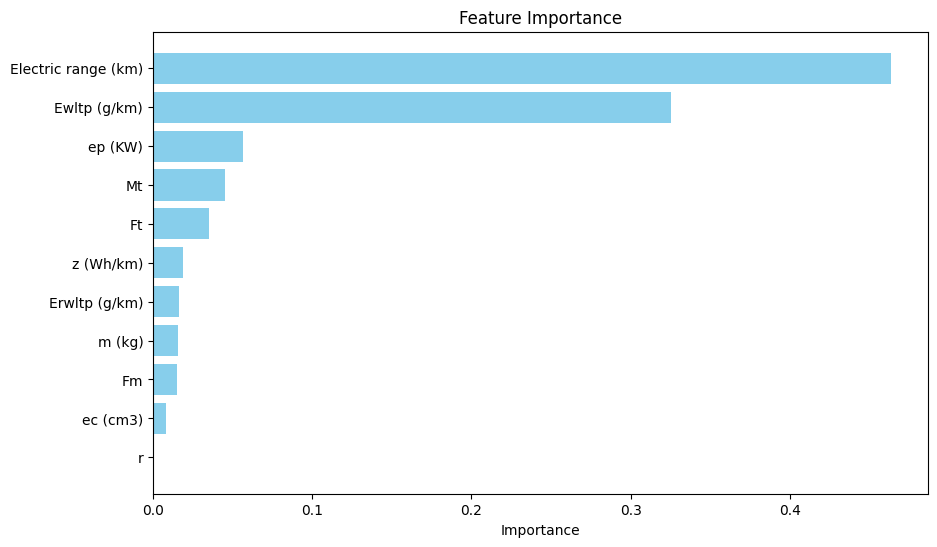

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

features = feature_names

feature_importance = model.feature_importances_

assert len(features) == len(feature_importance), "Number of features does not match the number of importances"

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

## Saving the trained model

In [ ]:
import joblib
joblib.dump(model, 'fuel_consumption_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

def predict_fuel_eff(input_data, model, scaler):
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)

    prediction = model.predict(input_scaled)
    return prediction[0]

input_data = [1262.0, 1352.0, 133.0, 10, 4, 999.000000, 84.0, 171.866144, 1.560000, 5.800000, 318.846067] #row_0 example

model = RandomForestRegressor()
model.fit(x_train, y_train)

scaler = StandardScaler()
scaler.fit(x_train)

predicted_fuel_consumption = predict_fuel_eff(input_data, model, scaler)

print(f"Predicted Fuel Consumption: {predicted_fuel_consumption}")

Predicted Fuel Consumption: 19.571548612846538


## The goal of this project was to build a machine learning model that predicts the fuel consumption of a vehicle based on various input features. These features include attributes such as the vehicle's mass, engine capacity, fuel type, energy consumption, and other vehicle characteristics.

Data Cleaning: Missing values were handled by replacing them with the mean of the respective columns, ensuring there were no gaps in the dataset.

Feature Selection: The dataset consisted of multiple features such as:

1- m (kg): Vehicle mass
2- Mt: Maximum torque
3- Ewltp (g/km): Energy consumption in g/km
4- ec (cm3): Engine capacity
and many more..

Feature Scaling: A StandardScaler was applied to scale the features before feeding them into the machine learning model.

Model Selection: A RandomForestRegressor model was selected for its robustness and ability to handle non-linear relationships.

Model Training
The RandomForestRegressor model was trained using the processed features. The training process involved fitting the model to the data, which allowed it to learn the relationship between the input features and the target variable (fuel consumption).

Model Evaluation
After training the model, several metrics were computed to evaluate its performance:

Mean Squared Error (MSE):

Value: 0.1386
MSE measures the average squared difference between predicted and actual values. A lower MSE means better performance. In this case, an MSE of 0.1386 indicates that the model makes relatively small prediction errors.

Root Mean Squared Error (RMSE):

Value: 0.3722
RMSE provides a more interpretable measure of error in the same units as the target variable (fuel consumption). The RMSE of 0.3722 indicates that, on average, the model's predictions are off by 0.3722 units.

Mean Absolute Error (MAE):

Value: 0.0804
MAE gives the average of absolute differences between predicted and actual values. A lower MAE value indicates better performance.

R-squared (R²):

Value: 0.9379
R² measures the proportion of the variance in the target variable that is predictable from the input features. An R² value of 0.9379 means that the model explains nearly 94% of the variance in fuel consumption, indicating a strong model fit.

#### The RandomForestRegressor model for predicting vehicle fuel consumption has performed exceptionally well, with an R² of nearly 94%, indicating that the model can predict fuel consumption with high accuracy. The model's error metrics (MSE, RMSE, and MAE) are all low, indicating that the predictions are close to the actual values.